In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)

df = pd.read_csv('analysts_survey_1.1.csv')

df.columns

Index(['analyst_id', 'gender', 'age', 'data_analyzing', 'analyst_type',
       'data_science', 'living_area', 'office_area', 'job_percentage',
       'sallary', 'min_sallary Range', 'max_sallary Range', 'avg_sallary',
       'equity', 'experience_years', 'manager', 'school_degree',
       'course_taken', 'course_name', 'visualization_tool', 'using_sql',
       'required_statistic_knowledge', 'predictive_models',
       'wages_decrease_covid19', 'fired_covid19', 'company', 'startup_size'],
      dtype='object')

In [2]:
#cleaning 

#drop 
df.dropna(axis=0, how="any", thresh=None, subset=['avg_sallary'], inplace=True)
df['avg_sallary'].isna().sum()

df = df[df['job_percentage'] == 'Full-time']
df['job_percentage'].isna().sum()

df = df[df['data_analyzing'] == 'Yes']
df['data_analyzing'].isna().sum()

df.drop(df[df['company'] == 'IDF'].index, inplace=True)

# drop the 1 na so i can use this field in the regression model
df.dropna(axis=0, how="any", thresh=None, subset=['course_taken'], inplace=True)
df['course_taken'].isna().sum()

df.dropna(axis=0, how="any", thresh=None, subset=['equity'], inplace=True)
df['equity'].isna().sum()

0

In [3]:
#Adjusting data - changing text values to numbers
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['data_science'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['using_sql'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['predictive_models'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['wages_decrease_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['fired_covid19'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['equity'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['manager'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['course_taken'].replace(['No', 'Yes'], [0, 1], inplace=True)

#required_statistic_knowledge
df['required_statistic_knowledge'].replace(['No', 'Little', 'Medium', 'High'], [0, 1, 2, 3], inplace=True)

In [4]:
# age - all
df[['age']].describe()

,age
count,230.000000
mean,32.443478
std,4.904665
min,22.000000
25%,29.000000
50%,31.500000
75%,35.000000
max,49.000000


In [5]:
#df

In [6]:
df1 = df[["living_area", "avg_sallary", "data_science", "office_area", "manager", "gender", "age"]]
#df1

In [7]:
#avg. salary by living area
#df1["avg_sallary"].groupby([df1["data_science"], df1["living_area"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
#df1["avg_sallary"].groupby([df1["data_science"] , df1["office_area"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
# managers
#df1["avg_sallary"].groupby([df1["data_science"] , df1["manager"], df1["office_area"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
# managers gender
#df1["avg_sallary"].groupby([df1["gender"], df1["data_science"] , df1["manager"], df1["office_area"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

In [ ]:
# Living area vs. office erea
#df1["avg_sallary"].groupby([df1["office_area"], df1["living_area"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])

Text(0, 0.5, 'Avg Sallary')

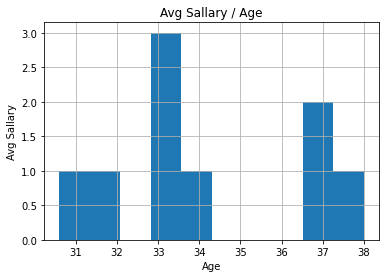

In [8]:
# Age - Salary with data scientists
df1["age"].groupby(df1["avg_sallary"]).aggregate([np.average]).hist()
plt.title('Avg Sallary / Age')
plt.xlabel('Age')
plt.ylabel('Avg Sallary')
#plt.show()

In [10]:
# df without data scientists
df1_analysts = df1[df1['data_science'] == 0]
#df1_analysts.describe()
#df1_analysts[["age", "avg_sallary"]]

In [11]:
# age - only analysts
df1_analysts[['age', 'gender']].describe()

,age,gender
count,218.000000,218.000000
mean,32.334862,0.344037
std,4.828179,0.476146
min,22.000000,0.000000
25%,29.000000,0.000000
50%,31.000000,0.000000
75%,35.000000,1.000000
max,49.000000,1.000000


In [14]:
#Gender
#df[['gender']].describe() # 155 males, 84 females

# Gender / Age
df1_analysts["age"].groupby(df1_analysts["gender"]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])


#df = df.groupby('gender')['avg_sallary'].mean().reset_index()

,average,median,max,std,count_nonzero
gender,,,,,
0,32.30,31,49,4.78,143
1,32.40,32,48,4.94,75


In [ ]:
#df

In [ ]:
#analysts - age / avg.salary by gender


#df1_analysts["avg_sallary"].groupby([df1["gender"], df1["age"]]).aggregate([np.average, np.median, max, np.std, np.count_nonzero])